# 정렬
데이터를 특정한 기준에 따라 순서대로 나열하는 것

## 1. 선택정렬
선택되지 않은 데이터중 가장 작은 데이터를 선택하여 맨 앞에 있는 데이터와 바꾸는 것을 반복
메번 탐색 범위가 하나씩 줄기 때문에 선행탐색으로 가능하다

### 시간복잡도
- 선택 정렬은 N번 만큼 가장 작은 수를 차자서 맨 앞으로 보내야 한다
- 구현 방식에 따라서 사소한 오차가 있을 수 있지만 전체 연산횟수는 n +(n-1)+...+2이다
- 이는 빅오 표기법에 따라 O(N^2)이다

In [2]:
 #예시
array = [7, 5, 9, 0, 3, 1,6,2,4,8]

for i in range(len(array)):
    min_index = i
    for j in range(i+1, len(array)):
        if array[min_index] > array[j]:
            min_index = j
    array[i], array[min_index] = array[min_index] , array[i]

print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## 2. 삽입정렬
- 개념: 처리되지 않은 데이터를 하나씩 골라 적절한 위치에 삽입한다
- 특징: 선택정렬에 비해 구현 난이도가 높은 편이지만, 일반적으로 더 효율적으로 동작한다
- 방법: 어떤 기준점을 정해서 앞은 정렬되어 있다고 가정하고 그 뒤에서 하나씩 앞 어디에 넣어야 할지 정해서 그 위치에 넣어주면 된다

### 시간복잡도
- 삽입 정렬의 시간 복잡도는 O(N^2)이며, 선택 정렬과 마찬가지로 반복문이 두 번 중첩되어 사용된다
- 삽입 정렬은 현재 리스트의 데이터가 거의 정렬되어 있는 상태라면 매우 빠르게 동작한다
- 최선의 경우 O(N)의 시간 복잡도를 가진다


In [4]:
#예시
array = [7, 5, 9, 0, 3, 1,6,2,4,8]

for i in range(1, len(array)):
    for j in range(i, 0 , -1):
        if array[j] < array[j-1]:
            array[j] , array[j-1] = array[j-1] , array[j]
        else: #자기보다 작은 데이터를 만나면 그 위치에서 멈춤
            break
            
            

## 3. 퀵 정렬
- 개념: 기준 데이터를 설정하고 그 기준보다 큰 데이터와 작은 데이터의 위필ㄹ 바꾸는 방법
- 특징
    - 일반적인 상황에서 가장 많이 사용되는 정렬 알고리즘 중 하나이다
    - 병합 정렬과 더불어 대부분의 프로그래밍 언어의 정렬 라이브러리의 근간이 되는 알고리즘이다
    - 가장 기본적인 퀵 정렬은 첫 번째 데이터를 기준 데이터로 설정한다

- 분할과 재귀적인 방법이 사용된다

- 왜 빠를까?: 이상적인 경우 분할이 절반씩 일어난다면 전체 연산 횟수로 O(NlogN)를 기대할 수 있다 

### 시간 복잡도
- 평균의 경우 O(NlogN)의 시간 복잡도를 가진다
- 최악의 경우 O(N^2)의 시간 복잡도를 가진다 (이 때 피벗이 얼마 만큼을 분할했냐에 따라 다르다)
- 프로그래밍 언어에서는 이 피벗 지정을 잘 활용하여 최악의 경우에도 O(NlogN)이 나오게 한다 44 

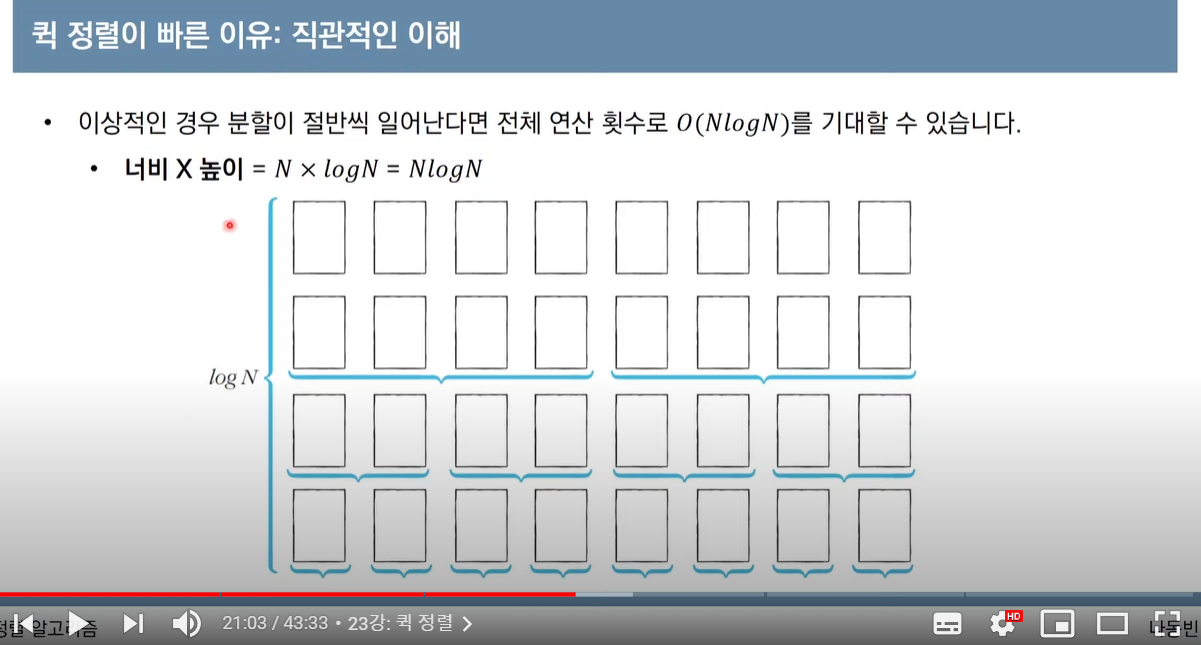

In [9]:
#예시
array = [ 5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort(array, start, end):
    if start >= end:
        return
    pivot = start
    left = start +1
    right = end
    while(left <= right):
        while(left <= end and array[left]< array[pivot]):
            left += 1
        while(right > start and array[right] > array[pivot]):
            right -= 1
        
        if left > right:
            array[right], array[pivot] = array[pivot], array[right]
        else:
            array[left], array[right] = array[right], array[left]
    
    quick_sort(array, start, right-1)
    quick_sort(array, right+1, end)
    
quick_sort(array, 0, len(array)-1)
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [29]:
# 파이썬의 장점을 살린 코드

array = [ 5, 7, 9, 0, 3, 1, 6, 2, 4, 8]

def quick_sort2(array):
    if len(array) <=1:
        return array
    pivot = array[0]
    tail = array[1:]
    
    left_side = [x for x in tail if x <= pivot]
    right_side =[x for x in tail if x > pivot]
    
    return quick_sort2(left_side) + [pivot] + quick_sort2(right_side)

print(quick_sort2(array))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


## 계수 정렬
- 특정한 조건이 부합할 때만 사용할 수 있지만 매우 빠르게 동작하는 정렬 알고리즘
- 데이터의 크기 범위가 제한되어 정수 형태로 표현할 수 있을 사용 가능
- 데이터의 개수가 N, 데이터(양수) 중 최댓값이 K일 때 최악의 경우에도 수행시간 O(N+K)를 보장, 공간 복잡도 역시 O(N+K)
- 예외 상황: 데이터가 0과 999,999로 단 2개만 존재하는 경우 너무 비효율적
- 효과적인 상황: 동일한 값을 가지는 데이터가 여러개 등장할 때 효과적, 예)성적

In [33]:
# 예시
array = [7, 5, 9, 0, 3, 1, 6, 2, 9, 1, 4, 8 ,0 ,5, 2]
count =[0] * (max(array)+1)

for i in range(len(array)):
    count[array[i]] += 1
    
for i, val in enumerate(count):
    for j in range(val):
        print(i, end = ' ')

0 0 1 1 2 2 3 4 5 5 6 7 8 9 9 

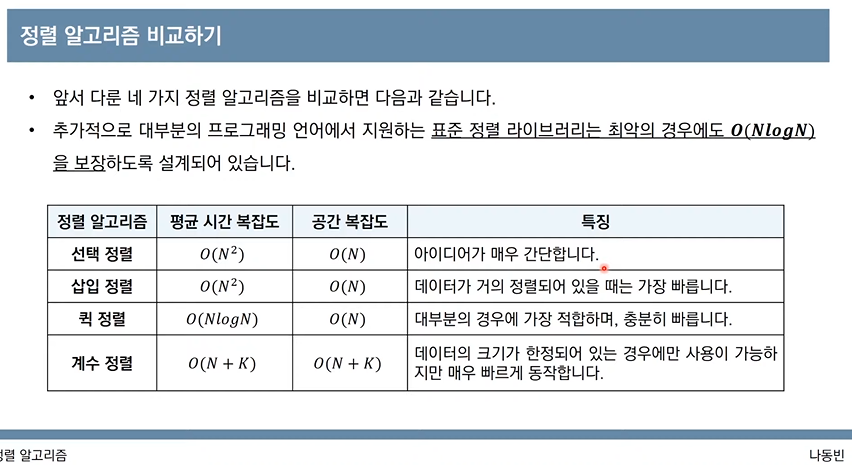

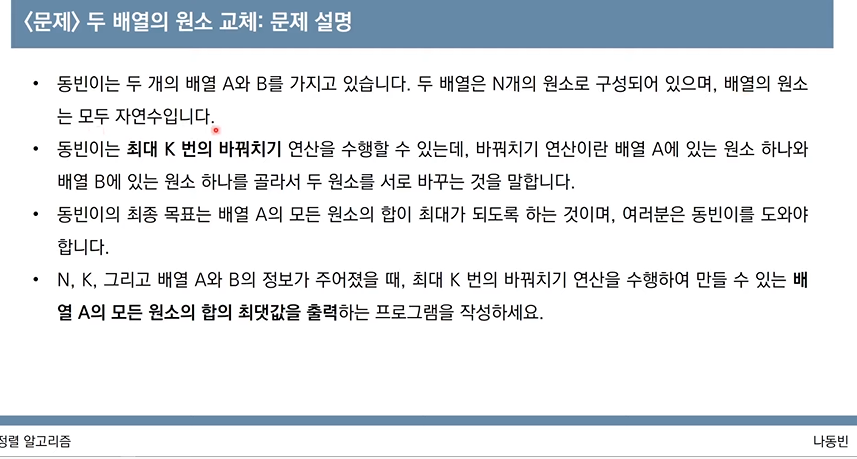

In [ ]:
n,k = map(int,input().split())
a = list(map(int,input().split()))
b = list(map(int,input().split()))

In [ ]:
a.sort()
b.sort(reverse = True)

for i in range(k):
    if a[i] < b[i]:
        a[i], b[i] = b[i],a[i]
    else:
        break
        
print(sum(a))